In [7]:
import nltk
nltk.download('punkt')   # Baixa o tokenizador de pontuação
nltk.download('all')     # Baixa todos os recursos necessários

text = "Este é um teste. O NLTK parece estar com problemas."
tokens = nltk.word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |   

['Este', 'é', 'um', 'teste', '.', 'O', 'NLTK', 'parece', 'estar', 'com', 'problemas', '.']


[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_d

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Baixar pacotes necessários do NLTK
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhuyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#  Carregar os Dados
def carregar_dados(caminho_arquivo):
    with open(caminho_arquivo, "r", encoding="utf-8") as arquivo:
        dados = json.load(arquivo)
    return pd.DataFrame(dados["data"])

df = carregar_dados("Discursos_PLs_Novo_Ensino_Medio_01.json")

In [ ]:
def estatisticas_basicas(df):
    print("\n Estatísticas Gerais:")
    print(df.describe())

    print("\n Quantidade de discursos por partido:")
    print(df["siglaPartido"].value_counts())

    df["tamanho_texto"] = df["transcricao"].apply(lambda x: len(x.split()))
    print("\n Estatísticas do tamanho dos discursos (em número de palavras):")
    print(df["tamanho_texto"].describe())

estatisticas_basicas(df)


📌 Estatísticas Gerais:
           idEvento     idDeputado  idLegislatura  tamanho_texto  sentimento
count     20.000000      20.000000           20.0       20.00000   20.000000
mean   72249.200000  159367.200000           57.0      589.75000    0.111557
std     1246.206184   66341.027041            0.0      536.04594    0.288718
min    69945.000000   74057.000000           57.0      160.00000   -0.285000
25%    71671.500000   74335.250000           57.0      367.00000    0.000000
50%    72167.000000  204533.000000           57.0      441.00000    0.000000
75%    73609.500000  220589.000000           57.0      565.00000    0.187784
max    73863.000000  221338.000000           57.0     2387.00000    0.700000

📌 Quantidade de discursos por partido:
siglaPartido
PT       5
PCdoB    5
União    3
PDT      2
PSOL     2
PSB      2
MDB      1
Name: count, dtype: int64

📌 Estatísticas do tamanho dos discursos (em número de palavras):
count      20.00000
mean      589.75000
std       536.04594
m

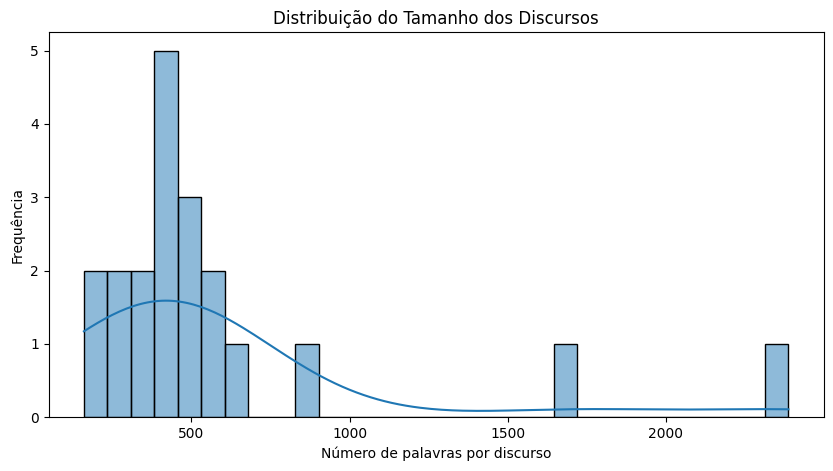

In [11]:

# Analisar Tamanho dos Discursos
plt.figure(figsize=(10, 5))
sns.histplot(df["tamanho_texto"], bins=30, kde=True)
plt.xlabel("Número de palavras por discurso")
plt.ylabel("Frequência")
plt.title("Distribuição do Tamanho dos Discursos")
plt.show()

In [ ]:
stop_words = set(stopwords.words("portuguese"))

# Tokenização e remoção de stopwords
todos_os_textos = " ".join(df["transcricao"]).lower()
tokens = word_tokenize(todos_os_textos)
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

# Contagem das palavras mais comuns
contagem_palavras = Counter(tokens_filtrados)
palavras_comuns = contagem_palavras.most_common(20)

# Exibindo as palavras mais comuns
print("\n 20 Palavras mais comuns nos discursos:")
for palavra, freq in palavras_comuns:
    print(f"{palavra}: {freq}")



📌 20 Palavras mais comuns nos discursos:
educação: 116
ensino: 112
médio: 95
presidente: 67
novo: 54
projeto: 46
deputado: 44
deputados: 41
lei: 41
art: 41
formação: 39
brasil: 38
horas: 35
câmara: 33
estudantes: 33
porque: 32
aqui: 31
federal: 29
senado: 29
hoje: 28


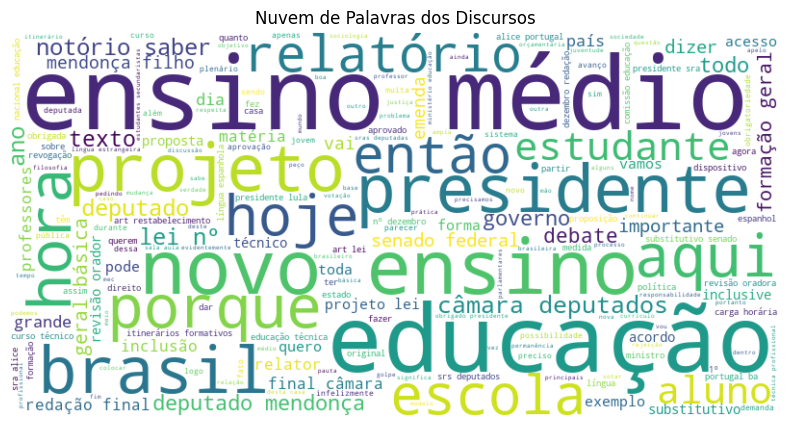

In [22]:
# Nuvem de Palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Discursos")
plt.show()

C:\Users\zhuyu\AppData\Local\Temp\ipykernel_27540\1416189095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["siglaPartido"], order=df["siglaPartido"].value_counts().index, palette="viridis")


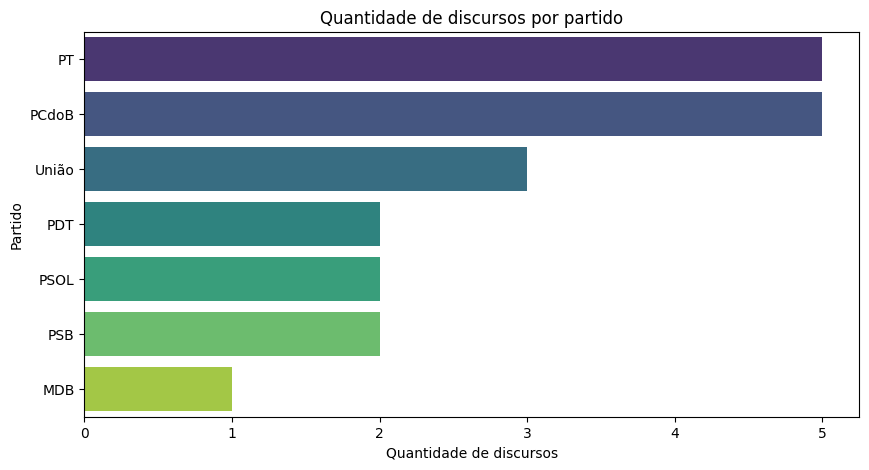

In [24]:
# Quantidade de discursos por partido
plt.figure(figsize=(10, 5))
sns.countplot(y=df["siglaPartido"], order=df["siglaPartido"].value_counts().index, palette="viridis")
plt.xlabel("Quantidade de discursos")
plt.ylabel("Partido")
plt.title("Quantidade de discursos por partido")
plt.show()


📌 Bigramas mais comuns:
[(('ensino', 'médio'), 89), (('novo', 'ensino'), 48), (('câmara', 'deputados'), 25), (('notório', 'saber'), 23), (('lei', 'nº'), 23), (('deputado', 'mendonça'), 21), (('formação', 'geral'), 19), (('geral', 'básica'), 19), (('senado', 'federal'), 18), (('mendonça', 'filho'), 17)]


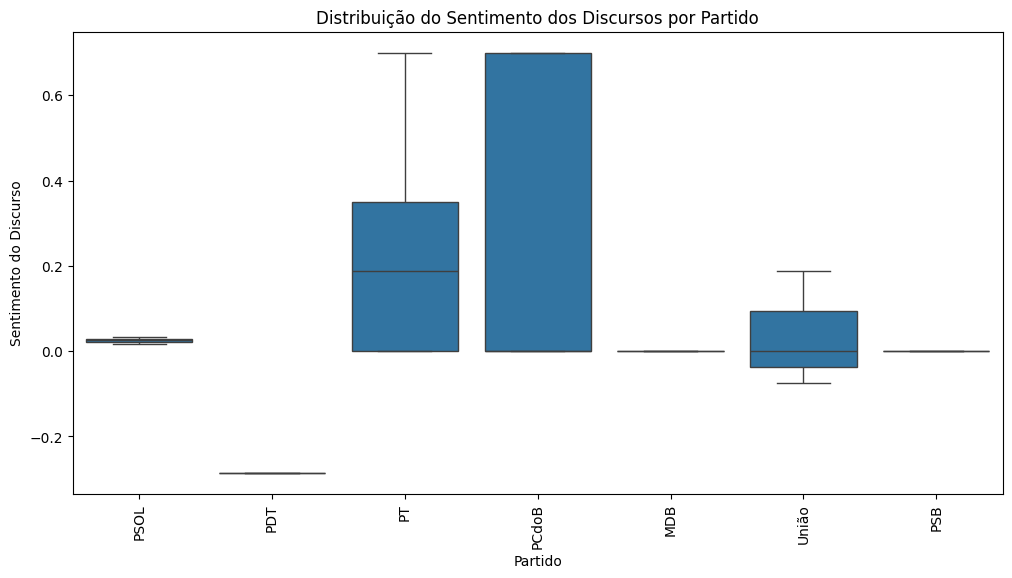

In [26]:

# digramas Mais Comuns
bigrams = list(nltk.bigrams(tokens_filtrados))
contagem_bigramas = Counter(bigrams)
print("\n📌 Bigramas mais comuns:")
print(contagem_bigramas.most_common(10))

# Análise de Sentimento
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Varia de -1 (negativo) a +1 (positivo)

df["sentimento"] = df["transcricao"].apply(get_sentiment)

#  Distribuição dos Sentimentos por Partido
plt.figure(figsize=(12, 6))
sns.boxplot(x="siglaPartido", y="sentimento", data=df)
plt.xticks(rotation=90)
plt.xlabel("Partido")
plt.ylabel("Sentimento do Discurso")
plt.title("Distribuição do Sentimento dos Discursos por Partido")
plt.show()
